# Use pipeline for MNIST

In [35]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

Using samples to train and validate. We now use 10000 samples for train and test. 

In [42]:
mnist = fetch_mldata('MNIST original')
data = mnist.data
target= mnist.target
print "Shape of Data: ", data.shape
print "Shape of Target", target.shape
X,  kaggle_x, Y, kaggle_y = train_test_split(data, target, train_size= 0.8)

Shape of Data:  (70000, 784)
Shape of Target (70000,)


Show test 

Sample shape:  (784,)


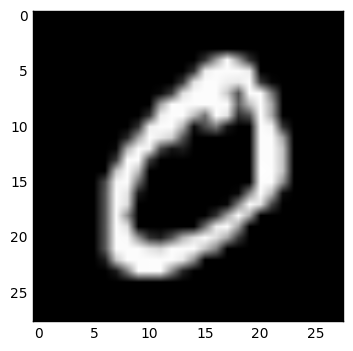

In [14]:
def showtest():
    sample = data[0]
    print "Sample shape: ", sample.shape

    %matplotlib inline

    sample = sample.reshape(28,28)
    plt.imshow(sample, cmap='gray')
    plt.show()

showtest()

### Use pipeline and gridsearchCV to extra features

1. KNN model to classify

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

combined_features = FeatureUnion([
        ("PCA", PCA()), 
        ("univ_select", SelectKBest())
])

pipeline = Pipeline([
  ('features', combined_features),
  ('KNN', KNeighborsClassifier())
])

param_grid ={
    'features__PCA__svd_solver': ['full', 'arpack', 'randomized'],
    'features__PCA__n_components':[1,2,3],
    'features__univ_select__k':[1,2],
}


cv = GridSearchCV(
    pipeline, param_grid={}, n_jobs=-1, verbose=1, cv=3, scoring='accuracy'
)
knncvscore = cv.fit(X, Y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python2.7/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  51  52  53  54  55  56  57
  82  83  84  85 111 112 140 168 392 476 504 532 560 615 643 644 671 672
 673 698 699 700 701 726 727 728 729 730 753 754 755 756 757 758 759 780
 781 782 783] are constant.
  UserWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  52  53  54
  55  56  57  58  82  83  84  85 111 112 140 141 168 196 224 364 448 476
 504 532 560 587 588 616 644 645 671 672 673 699 700 701 727 728 729 730
 731 753 754 755 756 757 758 759 780 781 782 783] are constant.
  UserWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/feature_selecti

In [45]:
from sklearn.metrics import accuracy_score
predictions = cv.predict(kaggle_x)
accscore = accuracy_score(predictions, kaggle_y)

print("Knn CV Score is: ", knncvscore)
print accscore

('Knn CV Score is: ', GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('PCA', PCA(copy=True, n_components=None, whiten=False)), ('univ_select', SelectKBest(k=10, score_func=<function f_classif at 0x7f8d61ea99b0>))],
       transformer_weights=None)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1))
0.9725
